Data Mining [H02C6a] - Spring 2023

# Predicting House Prices

![Predicting House Prices](house.jpg)

In this exercise, we will try to find out what influences the prices of residential homes rented in Ames, Iowa. The dataset is available on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) and consists of 79 features, each representing some aspect that could possibly be related to a house's price (a [list of all features](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) can be found in the data description on Kaggle). 

The goal of this exercise is to evaluate the performance of several linear regression methods on this dataset. More specifically, we'll compare ordinary least squares linear regression with its regularized versions (Lasso and Ridge).

Let's start by importing the required packages. We'll use ``scikit-learn`` in this session. You can install it using the following line:

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
# To suppress scikit-learn warnings
import warnings
warnings.filterwarnings('ignore')

## Load the house prices dataset

In [3]:
data = pd.read_csv('../datasets/houses.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Pre-processing

When looking at the dataset, it becomes immediately clear that there are some columns with missing values that must be replaced by some value. 

Note that it does not always make sense to fill in the missing value with mean/median/most common value of the corresponding feature. 

For this dataset, we will use the solution from the [notebook](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset) that already did a more clever missing value imputation based on additional information about the dataset.

In [4]:
# Alley : data description says NA means "no alley access"
data.loc[:, "Alley"] = data.loc[:, "Alley"].fillna("None")
# BedroomAbvGr: NA most likely means 0
data.loc[:, "BedroomAbvGr"] = data.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc: data description says NA for basement features is "no basement"
data.loc[:, "BsmtQual"] = data.loc[:, "BsmtQual"].fillna("No")
data.loc[:, "BsmtCond"] = data.loc[:, "BsmtCond"].fillna("No")
data.loc[:, "BsmtExposure"] = data.loc[:, "BsmtExposure"].fillna("No")
data.loc[:, "BsmtFinType1"] = data.loc[:, "BsmtFinType1"].fillna("No")
data.loc[:, "BsmtFinType2"] = data.loc[:, "BsmtFinType2"].fillna("No")
data.loc[:, "BsmtFullBath"] = data.loc[:, "BsmtFullBath"].fillna(0)
data.loc[:, "BsmtHalfBath"] = data.loc[:, "BsmtHalfBath"].fillna(0)
data.loc[:, "BsmtUnfSF"] = data.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir: NA most likely means No
data.loc[:, "CentralAir"] = data.loc[:, "CentralAir"].fillna("N")
# Condition: NA most likely means Normal
data.loc[:, "Condition1"] = data.loc[:, "Condition1"].fillna("Norm")
data.loc[:, "Condition2"] = data.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch: NA most likely means no enclosed porch
data.loc[:, "EnclosedPorch"] = data.loc[:, "EnclosedPorch"].fillna(0)
# External stuff: NA most likely means average
data.loc[:, "ExterCond"] = data.loc[:, "ExterCond"].fillna("TA")
data.loc[:, "ExterQual"] = data.loc[:, "ExterQual"].fillna("TA")
# Fence: data description says NA means "no fence"
data.loc[:, "Fence"] = data.loc[:, "Fence"].fillna("No")
# FireplaceQu: data description says NA means "no fireplace"
data.loc[:, "FireplaceQu"] = data.loc[:, "FireplaceQu"].fillna("No")
data.loc[:, "Fireplaces"] = data.loc[:, "Fireplaces"].fillna(0)
# Functional: data description says NA means typical
data.loc[:, "Functional"] = data.loc[:, "Functional"].fillna("Typ")
# GarageType etc: data description says NA for garage features is "no garage"
data.loc[:, "GarageType"] = data.loc[:, "GarageType"].fillna("No")
data.loc[:, "GarageFinish"] = data.loc[:, "GarageFinish"].fillna("No")
data.loc[:, "GarageQual"] = data.loc[:, "GarageQual"].fillna("No")
data.loc[:, "GarageCond"] = data.loc[:, "GarageCond"].fillna("No")
data.loc[:, "GarageArea"] = data.loc[:, "GarageArea"].fillna(0)
data.loc[:, "GarageCars"] = data.loc[:, "GarageCars"].fillna(0)
# HalfBath: NA most likely means no half baths above grade
data.loc[:, "HalfBath"] = data.loc[:, "HalfBath"].fillna(0)
# HeatingQC: NA most likely means typical
data.loc[:, "HeatingQC"] = data.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr: NA most likely means 0
data.loc[:, "KitchenAbvGr"] = data.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual: NA most likely means typical
data.loc[:, "KitchenQual"] = data.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage: NA most likely means no lot frontage
data.loc[:, "LotFrontage"] = data.loc[:, "LotFrontage"].fillna(0)
# LotShape: NA most likely means regular
data.loc[:, "LotShape"] = data.loc[:, "LotShape"].fillna("Reg")
# MasVnrType: NA most likely means no veneer
data.loc[:, "MasVnrType"] = data.loc[:, "MasVnrType"].fillna("None")
data.loc[:, "MasVnrArea"] = data.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature: data description says NA means "no misc feature"
data.loc[:, "MiscFeature"] = data.loc[:, "MiscFeature"].fillna("No")
data.loc[:, "MiscVal"] = data.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF: NA most likely means no open porch
data.loc[:, "OpenPorchSF"] = data.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive: NA most likely means not paved
data.loc[:, "PavedDrive"] = data.loc[:, "PavedDrive"].fillna("N")
# PoolQC: data description says NA means "no pool"
data.loc[:, "PoolQC"] = data.loc[:, "PoolQC"].fillna("No")
data.loc[:, "PoolArea"] = data.loc[:, "PoolArea"].fillna(0)
# SaleCondition: NA most likely means normal sale
data.loc[:, "SaleCondition"] = data.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch: NA most likely means no screen porch
data.loc[:, "ScreenPorch"] = data.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd: NA most likely means 0
data.loc[:, "TotRmsAbvGrd"] = data.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities: NA most likely means all public utilities
data.loc[:, "Utilities"] = data.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF: NA most likely means no wood deck
data.loc[:, "WoodDeckSF"] = data.loc[:, "WoodDeckSF"].fillna(0)

# Handle remaining missing values for numerical features by using median as replacement
data= data.fillna(data.median())

In [5]:
# Drop the Id column
data.drop("Id", axis = 1, inplace = True)

Linear regression methods require the input data to be numerical. However, this is not the case for the dataset.

Let's see which attributes are numeric and which attributes are categorical.

In [6]:
num = data.select_dtypes(exclude = ["object"]).columns.drop("SalePrice")
data_num = data[num]

data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [7]:
cat = data.select_dtypes(include = ["object"]).columns
data_cat = data[cat]

data_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal


<b><font color = 'red'>Question 1</font> Replace the categorical attributes by numerical attributes and store them again in the `data_cat` dataframe.</b>

Hint: look for "get_dummies" in the `pandas` library.

In [8]:
data_cat = pd.get_dummies(data_cat, drop_first=True)

Next, we concatenate `data_num` and `data_cat` to create a dataframe `X` with the ready-to-use input data. We also create a series `y` with the target data.

In [9]:
X = pd.concat([data_num, data_cat], axis = 1)
y = data['SalePrice']

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


We then split the dataset in training and test data: a separate test set is needed to evaluate the different models.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

As a last step before we start comparing different regression methods, we standardize the numerical features.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,num] = scaler.fit_transform(X_train.loc[:,num])
X_test.loc[:,num] = scaler.transform(X_test.loc[:,num])

# Ordinary least squares linear regression

The first model you will evaluate is a least squares linear regression model.

We'll use the root mean squared error (RMSE) as the evaluation metric, which is defined as follows:

In [12]:
import math
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

<b><font color = 'red'>Question 2</font> Train a linear model for `X_train` and evaluate its RMSE on `X_test`.</b>

Hint: you can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">`LinearRegression`</a> class of scikit-learn.

In [13]:
from sklearn.linear_model import LinearRegression

model_ls = LinearRegression()
model_ls.fit(X_train, y_train)
y_pred = model_ls.predict(X_test)

rmse(y_test, y_pred)

39067640763939.81

# Regularized least squares linear regression

A common problem with least squares linear regression models is that their accuracy is heavily influenced by [collinearity](https://en.wikipedia.org/wiki/Collinearity) and noise in the input features.

To avoid this, we can use regularization techniques.

## L2-regularization (Ridge regression)

[Ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization), also known as Tikhonov regularization and weight decay, is arguably the most commonly used method of regularization of ill-posed problems.

<b><font color = 'red'>Question 3</font> Train an L2-regularized linear model with default parameter settings on the training set and evaluate the RMSE of the obtained model on the training set.</b>

Hint: you can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">`Ridge`</a> class of scikit-learn.

In [14]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)

rmse(y_test, y_pred)

42472.113513585056

<b><font color = 'red'>Question 4</font> Try fitting the model with different values of the regularization parameter `alpha`. Plot Ridge coefficients as a function of `alpha`. Discuss what you see.</b>

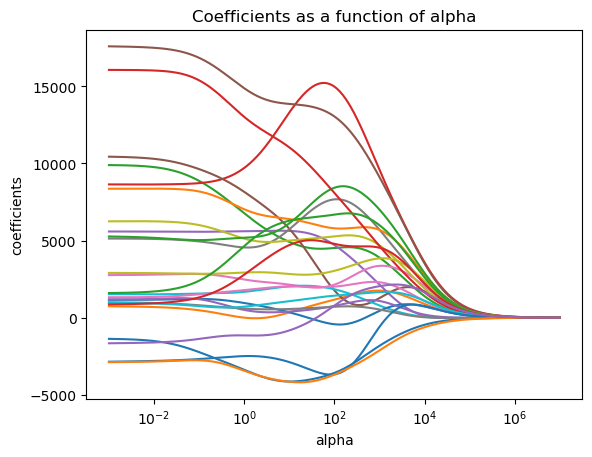

In [15]:
# Solution as in http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

n_alphas = 500
alphas = np.logspace(-3, 7, n_alphas)

# Fit the models
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    # We will look at the behaviour of the first 25 coeffitients
    coefs.append(ridge.coef_[:25])
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Coefficients as a function of alpha')
plt.show()

<b><font color = 'red'>Question 5</font> Now tune the `alpha` parameter and re-evaluate the `Ridge` regressor with the best value that you found.</b>

Hint: you can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html">`RidgeCV`</a> class of scikit-learn.

In [16]:
from sklearn.linear_model import RidgeCV

model_ridgecv = RidgeCV(cv=10)
model_ridgecv.fit(X_train, y_train)
best_alpha = model_ridgecv.alpha_

print("Best alpha = {}".format(best_alpha))

Best alpha = 1.0


## L1-regularization (Lasso regression)

<a href=https://en.wikipedia.org/wiki/Lasso_(statistics)>Lasso</a> (stands for Least Absolute Shrinkage and Selection Operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

<b><font color = 'red'>Question 6</font> Train an L1-regularized linear model with default parameter settings on the training set and evaluate the RMSE of the obtained model on the test set.</b>

Hint: you can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">`Lasso`</a> class of scikit-learn.

In [17]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)

rmse(y_test, y_pred)

49358.18828903203

If you look at the scikit-learn documentation, you will notice that `Lasso` has a parameter `alpha` which is the regularization constant for the L1-regularizer. In order to achieve a better accuracy, this parameter should be tuned.

<b><font color = 'red'>Question 7</font> Now tune the `alpha` parameter and re-evaluate the `Lasso` regressor with the best value that you found.</b>

Hint: you can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html">`LassoCV`</a> class of scikit-learn.

In [18]:
from sklearn.linear_model import LassoCV

model_lassocv = LassoCV(cv=10)
model_lassocv.fit(X_train, y_train)
best_alpha = model_lassocv.alpha_

print("Best alpha = {}".format(best_alpha))

Best alpha = 70.41412912286474


In [19]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=best_alpha)
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)

rmse(y_test, y_pred)

42758.525366181224

<b><font color = 'red'>Question 8</font> Plot the number of non-zero coefficients as a function of `alpha` and discuss what you see.</b>

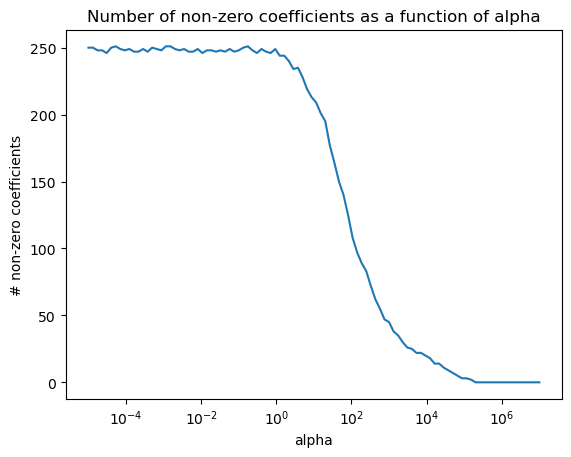

In [20]:
n_alphas = 100
alphas = np.logspace(-5, 7, n_alphas)

n_coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    n_coefs.append(len([c for c in lasso.coef_ if np.abs(c) > 0]))
    
ax = plt.gca()
ax.plot(alphas, n_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('# non-zero coefficients')
plt.title('Number of non-zero coefficients as a function of alpha')
plt.show()